In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
train_data = TabularDataset('../datasets/train.csv')

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/dataset.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  data = load_pd.load(file_path)


In [4]:
# Basic information about the data

train_data.info()

<class 'autogluon.core.dataset.TabularDataset'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Drop irrelevant columns
train_data.drop(['casual', 'registered'], axis=1, inplace=True)

train_data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


### Histogram

Text(0, 0.5, 'Season')

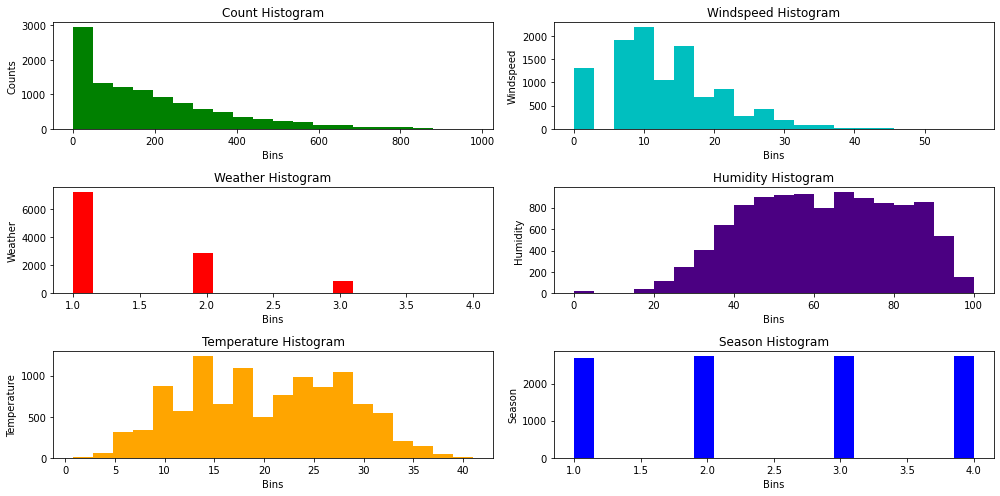

In [7]:
f, ax_arr = plt.subplots(3, 2, figsize=(14,7), tight_layout=True)
ax_arr[0,0].hist(train_data['count'], bins=20, color='green')
ax_arr[0,0].set_title('Count Histogram')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(train_data['windspeed'], bins=20, color='c')
ax_arr[0,1].set_title('Windspeed Histogram')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Windspeed')

ax_arr[1,0].hist(train_data['weather'], bins=20, color='red')
ax_arr[1,0].set_title('Weather Histogram')
ax_arr[1,0].set_xlabel('Bins')
ax_arr[1,0].set_ylabel('Weather')

ax_arr[1,1].hist(train_data.humidity, bins=20, color='indigo')
ax_arr[1,1].set_title('Humidity Histogram')
ax_arr[1,1].set_xlabel('Bins')
ax_arr[1,1].set_ylabel('Humidity')

ax_arr[2,0].hist(train_data.temp, bins=20, color='orange')
ax_arr[2,0].set_title('Temperature Histogram')
ax_arr[2,0].set_xlabel('Bins')
ax_arr[2,0].set_ylabel('Temperature')

ax_arr[2,1].hist(train_data.season, bins=20, color='blue')
ax_arr[2,1].set_title('Season Histogram')
ax_arr[2,1].set_xlabel('Bins')
ax_arr[2,1].set_ylabel('Season')



### Feature Engineering

In [8]:
# Feature Engineering: One-hot encoding of the 'season' feature

train_data = pd.get_dummies(train_data, columns= ['season'])


In [9]:
train_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,1,1,0,0,0


In [14]:
label = 'count'

In [15]:
train_data[label].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

### Model Training

In [16]:
save_path = '../models/models1'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "../models/models1/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6012.45 MB
	Train Data (Original)  Memory Usage: 1.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Gene

[1000]	train_set's rmse: 120.942	valid_set's rmse: 137.455


	-137.224	 = Validation root_mean_squared_error score
	3.19s	 = Training runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM ...
/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-135.2734	 = Validation root_mean_squared_error score
	0.58s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-124.1986	 = Validation root_mean_squared_error score
	4.08s	 = Training runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	-135.4852	 = Validation root_mean_squared_error score
	2.52s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-133.1373	 = Validation root_mean_squared_error score
	1.

In [126]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -106.468177       0.247333  89.673517                0.000647           0.629519            2       True         11
1               XGBoost -107.323891       0.125889  74.401607                0.125889          74.401607            1       True          9
2       RandomForestMSE -124.198592       0.086834   3.924964                0.086834           3.924964            1       True          5
3         ExtraTreesMSE -133.137330       0.066633   1.868657                0.066633           1.868657            1       True          7
4         LightGBMLarge -133.792102       0.017342   1.400202                0.017342           1.400202            1       True         10
5              LightGBM -135.273422       0.013618   0.612361                0.013618           0.

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:140: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -165.3253901971025,
  'KNeighborsDist': -174.0208265355214,
  'LightGBMXT': -137.22398616339171,
  'LightGBM': -135.27342240879952,
  'RandomForestMSE': -124.19859217806041,
  'CatBoost': -135.4851949497123,
  'ExtraTreesMSE': -133.13732993707615,
  'NeuralNetFastAI': -140.53479703552114,
  'XGBoost': -107.32389075515918,
  'LightGBMLarge': -133.79210211538518,
  'WeightedEnsemble_L2': -106.46817734823843},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': '../models/models1/models/KNeighborsUnif/',
  'KNeighborsDist': '../models/models1/models/KNe

### Prediction and Kaggle Submission for using default state of TabularPredictor

In [127]:
test_data = TabularDataset('../datasets/test.csv')
test_data.head()

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/dataset.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  data = load_pd.load(file_path)
Loaded data from: ../datasets/test.csv | Columns = 9 / 9 | Rows = 6493 -> 6493


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [128]:
# One-hot encoding on 'session'
test_data = pd.get_dummies(test_data, columns= ['season'])
test_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [130]:
y_pred = predictor.predict(test_data)
y_pred.head()

0    48.342979
1    45.942558
2    45.943214
3    58.169914
4    58.176918
Name: count, dtype: float32

In [131]:
submission = pd.read_csv('../datasets/sample_submission.csv')
submission['count'] = y_pred
submission['count'] = submission['count'].astype(int)
submission.head()


,datetime,count
0,2011-01-20 00:00:00,48
1,2011-01-20 01:00:00,45
2,2011-01-20 02:00:00,45
3,2011-01-20 03:00:00,58
4,2011-01-20 04:00:00,58


In [165]:
submission[submission['count'] < 0]

,datetime,count
46,2011-01-21 22:00:00,-53
47,2011-01-21 23:00:00,-41
48,2011-01-22 00:00:00,-40
49,2011-01-22 01:00:00,-43
50,2011-01-22 02:00:00,-40
...,...,...
5995,2012-11-22 03:00:00,-21
5997,2012-11-22 05:00:00,-21
5998,2012-11-22 06:00:00,-1
6000,2012-11-22 08:00:00,-15


In [166]:
# Some predictions are negative we set these to 0
submission.loc[submission['count'] < 0,'count'] = 0

In [167]:
submission[submission['count'] < 0]

,datetime,count


In [168]:
submission.to_csv('../datasets/my_submission1.csv', index=False)

In [133]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission1.csv -m "First submission with default parameters for TabularPredictor"

100%|████████████████████████████████████████| 150k/150k [00:07<00:00, 19.6kB/s]
Successfully submitted to Bike Sharing Demand

### Prediction and Kaggle Submission with custom Hyperparameters

#### xgb n_estimators=1500; hyperparameter_tune_kwargs = {'num_trials': 5, 'scheduler' : 'local', 'searcher': 'auto'}; time_limit=600s

In [18]:
save_path = '../models/models2'

In [19]:
import autogluon.core as ag


xgb_params = {
    'n_estimators': 15000
}

hyperparameters = {'XGB': xgb_params}
hyperparameter_tune_kwargs = {'num_trials': 5, 'scheduler' : 'local', 'searcher': 'auto'}

predictor2 = TabularPredictor(
    label='count', 
    eval_metric='mean_absolute_error', 
    path=save_path
).fit(
    train_data, 
    time_limit=10*60,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)





Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "../models/models2/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5999.73 MB
	Train Data (Original)  Memory Usage: 1.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost/T0 ...
	-73.9976	 = Validation mean_absolute_error score
	91.84s	 = Training runtime
	0.28s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	-84.1207	 = Validation mean_absolute_error score
	21.68s	 = Training runtime
	0.12s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-84.7956	 = Validation mean_absolute_error score
	48.26s	 = Training runtime
	0.41s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-89.4178	 = Validation mean_absolute_error score
	92.67s	 = Training runtime
	0.7s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-81.0568	 = Validation mean_absolute_error score
	31.96s	 = Training runtime
	0.2s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 255.73s of remaining time.
	-73.9281	 = Validation mean_absolute_error score
	0.35s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 344.68s ...
TabularPredictor saved. To load, use: predictor = Tabul

In [137]:
predictor2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -73.948213       0.373106  101.753247                0.000628           0.383145            2       True          6
1           XGBoost/T0 -73.997585       0.279391   83.124920                0.279391          83.124920            1       True          1
2           XGBoost/T3 -82.756939       0.093087   18.245182                0.093087          18.245182            1       True          4
3           XGBoost/T2 -83.216065       0.720615  104.456633                0.720615         104.456633            1       True          3
4           XGBoost/T1 -83.521051       0.474872   92.557419                0.474872          92.557419            1       True          2
5           XGBoost/T4 -86.665337       0.604160   79.183224                0.604160          79.183224 

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:140: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost/T0': -73.99758514630565,
  'XGBoost/T1': -83.5210506740352,
  'XGBoost/T2': -83.21606495570053,
  'XGBoost/T3': -82.75693888899326,
  'XGBoost/T4': -86.66533711841339,
  'WeightedEnsemble_L2': -73.94821260754563},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'XGBoost/T0': '../models/models2/models/XGBoost/T0/',
  'XGBoost/T1': '../models/models2/models/XGBoost/T1/',
  'XGBoost/T2': '../models/models2/models/XGBoost/T2/',
  'XGBoost/T3': '../models/models2/models/XGBoost/T3/',
  'XGBoost/T4': '../models/models2/models/XGBoost/T4/',
  'WeightedEnsemble_L2': '../models/models2/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'XGBoost/T0': 83.124920129776,
  'XGBoost/T1': 92.55741906166077,
  'XGBoost/T2': 104.4566330909729

In [140]:
y_pred = predictor2.predict(test_data)
y_pred.head()

0    17.190975
1    26.792797
2    26.792797
3    54.563950
4    54.563950
Name: count, dtype: float32

In [154]:
submission2 = pd.read_csv('../datasets/sample_submission.csv')
submission2['count'] = y_pred
submission2['count'] = submission['count'].astype(int)
submission2.head()

,datetime,count
0,2011-01-20 00:00:00,48
1,2011-01-20 01:00:00,45
2,2011-01-20 02:00:00,45
3,2011-01-20 03:00:00,58
4,2011-01-20 04:00:00,58


In [155]:
submission2[submission2['count'] < 0]

,datetime,count
46,2011-01-21 22:00:00,-53
47,2011-01-21 23:00:00,-41
48,2011-01-22 00:00:00,-40
49,2011-01-22 01:00:00,-43
50,2011-01-22 02:00:00,-40
...,...,...
5995,2012-11-22 03:00:00,-21
5997,2012-11-22 05:00:00,-21
5998,2012-11-22 06:00:00,-1
6000,2012-11-22 08:00:00,-15


In [157]:
# Some predictions are negative we set these to 0
submission2.loc[submission2['count'] < 0,'count'] = 0

In [162]:
submission2[submission2['count'] < 0]

,datetime,count


In [163]:
submission2.to_csv('../datasets/my_submission2.csv', index=False)

In [164]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission2.csv -m "Second submission after manually tunning hypeparameters for XGBoost"



100%|████████████████████████████████████████| 149k/149k [00:09<00:00, 16.0kB/s]
Successfully submitted to Bike Sharing Demand

#### xgb n_estimators=1500; hyperparameter_tune_kwargs = {'num_trials': 8, 'scheduler' : 'local', 'searcher': 'auto'}; time_limit=780s

In [172]:
save_path = '../models/models3'

In [173]:
import autogluon.core as ag


xgb_params = {
    'n_estimators': 15000
}

hyperparameters = {'XGB': xgb_params}
hyperparameter_tune_kwargs = {'num_trials': 7, 'scheduler' : 'local', 'searcher': 'auto'}

predictor3 = TabularPredictor(
    label='count', 
    eval_metric='mean_absolute_error', 
    path=save_path
).fit(
    train_data, 
    time_limit=13*60,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)



Beginning AutoGluon training ... Time limit = 780s
AutoGluon will save models to "../models/models3/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7974.71 MB
	Train Data (Original)  Memory Usage: 1.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

  0%|          | 0/7 [00:00<?, ?it/s]

Fitted model: XGBoost/T0 ...
	-73.9976	 = Validation mean_absolute_error score
	82.76s	 = Training runtime
	0.25s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	-86.0826	 = Validation mean_absolute_error score
	48.11s	 = Training runtime
	0.21s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-80.1821	 = Validation mean_absolute_error score
	107.26s	 = Training runtime
	0.7s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-89.3751	 = Validation mean_absolute_error score
	21.99s	 = Training runtime
	0.15s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-84.6924	 = Validation mean_absolute_error score
	73.79s	 = Training runtime
	0.4s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-68.647	 = Validation mean_absolute_error score
	36.83s	 = Training runtime
	0.21s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-83.7627	 = Validation mean_absolute_error score
	7.99s	 = Training runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training mod

In [174]:
predictor3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -68.078377       0.508364  127.847934                0.000537           0.262959            2       True          8
1           XGBoost/T5 -68.647045       0.207144   36.834860                0.207144          36.834860            1       True          6
2           XGBoost/T0 -73.997585       0.251381   82.761523                0.251381          82.761523            1       True          1
3           XGBoost/T2 -80.182102       0.695912  107.255252                0.695912         107.255252            1       True          3
4           XGBoost/T6 -83.762668       0.049302    7.988592                0.049302           7.988592            1       True          7
5           XGBoost/T4 -84.692350       0.401936   73.794942                0.401936          73.794942 

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:140: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'XGBoost/T5': 'XGBoostModel',
  'XGBoost/T6': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost/T0': -73.99758514630565,
  'XGBoost/T1': -86.0825905764289,
  'XGBoost/T2': -80.18210203852077,
  'XGBoost/T3': -89.37511603270818,
  'XGBoost/T4': -84.69235034071122,
  'XGBoost/T5': -68.64704450184978,
  'XGBoost/T6': -83.76266761542844,
  'WeightedEnsemble_L2': -68.07837703503853},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'XGBoost/T0': '../models/models3/models/XGBoost/T0/',
  'XGBoost/T1': '../models/models3/models/XGBoost/T1/',
  'XGBoost/T2': '../models/models3/models/XGBoost/T2/',
  'XGBoost/T3': '../models/models3/models/XGBoost/T3/',
  'XGBoost/T4': '../models/models3/models/XGBoost/T4/',
  'XGBoost/T5': '../models/models3/models/XGBoost/T5/',
  '

In [175]:
y_pred = predictor3.predict(test_data)
y_pred.head()

0    26.050915
1    19.925856
2    19.925856
3    45.038376
4    45.038376
Name: count, dtype: float32

In [176]:
submission3 = pd.read_csv('../datasets/sample_submission.csv')
submission3['count'] = y_pred
submission3['count'] = submission['count'].astype(int)
submission3.head()

,datetime,count
0,2011-01-20 00:00:00,48
1,2011-01-20 01:00:00,45
2,2011-01-20 02:00:00,45
3,2011-01-20 03:00:00,58
4,2011-01-20 04:00:00,58


In [180]:
submission3[submission3['count'] == 0]

,datetime,count
46,2011-01-21 22:00:00,0
47,2011-01-21 23:00:00,0
48,2011-01-22 00:00:00,0
49,2011-01-22 01:00:00,0
50,2011-01-22 02:00:00,0
...,...,...
5995,2012-11-22 03:00:00,0
5997,2012-11-22 05:00:00,0
5998,2012-11-22 06:00:00,0
6000,2012-11-22 08:00:00,0


In [ ]:
# Some predictions are negative we set these to 0
submission2.loc[submission2['count'] < 0,'count'] = 0

In [ ]:
submission3[submission3['count'] < 0]

In [181]:
submission3.to_csv('../datasets/my_submission3.csv', index=False)

In [182]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission3.csv -m "Third submission after manually tunning hypeparameters for XGBoost"



100%|████████████████████████████████████████| 149k/149k [00:05<00:00, 25.7kB/s]
Successfully submitted to Bike Sharing Demand

#### xgb n_estimators=2000; hyperparameter_tune_kwargs = {'num_trials': 5, 'scheduler' : 'local', 'searcher': 'auto'}; time_limit=780s


In [185]:
save_path = '../models/models4'

In [186]:
import autogluon.core as ag


xgb_params = {
    'n_estimators': 20000
}

hyperparameters = {'XGB': xgb_params}
hyperparameter_tune_kwargs = {'num_trials': 5, 'scheduler' : 'local', 'searcher': 'auto'}

predictor4 = TabularPredictor(
    label='count', 
    eval_metric='mean_absolute_error', 
    path=save_path
).fit(
    train_data, 
    time_limit=13*60,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)



Beginning AutoGluon training ... Time limit = 780s
AutoGluon will save models to "../models/models4/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6320.87 MB
	Train Data (Original)  Memory Usage: 1.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost/T0 ...
	-73.9976	 = Validation mean_absolute_error score
	90.37s	 = Training runtime
	0.28s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	-83.6815	 = Validation mean_absolute_error score
	38.42s	 = Training runtime
	0.35s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-84.9494	 = Validation mean_absolute_error score
	9.83s	 = Training runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-88.3278	 = Validation mean_absolute_error score
	91.37s	 = Training runtime
	0.5s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-76.0569	 = Validation mean_absolute_error score
	79.27s	 = Training runtime
	0.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 417.1s of remaining time.
	-73.433	 = Validation mean_absolute_error score
	0.26s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 363.26s ...
TabularPredictor saved. To load, use: predictor = Tabular

In [188]:
predictor4.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -73.433012       0.595121  169.894667                0.000684           0.262713            2       True          6
1           XGBoost/T0 -73.997585       0.280066   90.365452                0.280066          90.365452            1       True          1
2           XGBoost/T4 -76.056907       0.314371   79.266502                0.314371          79.266502            1       True          5
3           XGBoost/T1 -83.681521       0.347355   38.420440                0.347355          38.420440            1       True          2
4           XGBoost/T2 -84.949373       0.048995    9.826530                0.048995           9.826530            1       True          3
5           XGBoost/T3 -88.327840       0.498111   91.367129                0.498111          91.367129 

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:140: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost/T0': -73.99758514630565,
  'XGBoost/T1': -83.68152065064734,
  'XGBoost/T2': -84.94937331516114,
  'XGBoost/T3': -88.32783995665733,
  'XGBoost/T4': -76.05690736589736,
  'WeightedEnsemble_L2': -73.43301170066862},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'XGBoost/T0': '../models/models4/models/XGBoost/T0/',
  'XGBoost/T1': '../models/models4/models/XGBoost/T1/',
  'XGBoost/T2': '../models/models4/models/XGBoost/T2/',
  'XGBoost/T3': '../models/models4/models/XGBoost/T3/',
  'XGBoost/T4': '../models/models4/models/XGBoost/T4/',
  'WeightedEnsemble_L2': '../models/models4/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'XGBoost/T0': 90.36545205116272,
  'XGBoost/T1': 38.42044019699097,
  'XGBoost/T2': 9.826529979705

In [189]:
y_pred = predictor4.predict(test_data)
y_pred.head()

0    26.843996
1    29.854111
2    29.854111
3    58.274384
4    58.274384
Name: count, dtype: float32

In [190]:
submission4 = pd.read_csv('../datasets/sample_submission.csv')
submission4['count'] = y_pred
submission4['count'] = submission['count'].astype(int)
submission4.head()

,datetime,count
0,2011-01-20 00:00:00,48
1,2011-01-20 01:00:00,45
2,2011-01-20 02:00:00,45
3,2011-01-20 03:00:00,58
4,2011-01-20 04:00:00,58


In [191]:
submission5[submission5['count'] < 0]

,datetime,count


In [192]:
submission4.to_csv('../datasets/my_submission4.csv', index=False)

In [194]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission4.csv -m "Fourth submission after further manually tunning hypeparameters for XGBoost"



100%|████████████████████████████████████████| 149k/149k [00:04<00:00, 34.4kB/s]
Successfully submitted to Bike Sharing Demand

#### xgb n_estimators=2000; xgb learnin_rate=0.05 hyperparameter_tune_kwargs = {'num_trials': 5, 'scheduler' : 'local', 'searcher': 'auto'}; time_limit=780s


In [203]:
save_path = '../models/models5'

In [204]:
import autogluon.core as ag


xgb_params = {
    'n_estimators': 10000,
    'learning_rate': 0.05
}

hyperparameters = {'XGB': xgb_params}
hyperparameter_tune_kwargs = {'num_trials': 5, 'scheduler' : 'local', 'searcher': 'auto'}

predictor5 = TabularPredictor(
    label='count', 
    eval_metric='mean_absolute_error', 
    path=save_path
).fit(
    train_data, 
    time_limit=13*60,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


Beginning AutoGluon training ... Time limit = 780s
AutoGluon will save models to "../models/models5/"
AutoGluon Version:  0.2.0
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6399.06 MB
	Train Data (Original)  Memory Usage: 1.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: XGBoost/T0 ...
	-74.4573	 = Validation mean_absolute_error score
	77.02s	 = Training runtime
	0.29s	 = Validation runtime
Fitted model: XGBoost/T1 ...
	-84.9968	 = Validation mean_absolute_error score
	59.08s	 = Training runtime
	0.47s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-81.0363	 = Validation mean_absolute_error score
	55.1s	 = Training runtime
	0.34s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-74.3734	 = Validation mean_absolute_error score
	52.94s	 = Training runtime
	0.23s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-81.9547	 = Validation mean_absolute_error score
	40.26s	 = Training runtime
	0.22s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 454.63s of remaining time.
	-73.3529	 = Validation mean_absolute_error score
	0.28s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 325.72s ...
TabularPredictor saved. To load, use: predictor = Tabu

In [205]:
predictor5.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -73.352859       0.524666  130.235204                0.000630           0.281142            2       True          6
1           XGBoost/T3 -74.373434       0.233315   52.936193                0.233315          52.936193            1       True          4
2           XGBoost/T0 -74.457304       0.290720   77.017869                0.290720          77.017869            1       True          1
3           XGBoost/T2 -81.036264       0.342613   55.104013                0.342613          55.104013            1       True          3
4           XGBoost/T4 -81.954674       0.217433   40.255826                0.217433          40.255826            1       True          5
5           XGBoost/T1 -84.996824       0.467818   59.081994                0.467818          59.081994 

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:140: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost/T0': -74.45730376954612,
  'XGBoost/T1': -84.99682368623748,
  'XGBoost/T2': -81.03626419542934,
  'XGBoost/T3': -74.37343365748997,
  'XGBoost/T4': -81.95467414296445,
  'WeightedEnsemble_L2': -73.35285883233348},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'XGBoost/T0': '../models/models5/models/XGBoost/T0/',
  'XGBoost/T1': '../models/models5/models/XGBoost/T1/',
  'XGBoost/T2': '../models/models5/models/XGBoost/T2/',
  'XGBoost/T3': '../models/models5/models/XGBoost/T3/',
  'XGBoost/T4': '../models/models5/models/XGBoost/T4/',
  'WeightedEnsemble_L2': '../models/models5/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'XGBoost/T0': 77.01786875724792,
  'XGBoost/T1': 59.08199405670166,
  'XGBoost/T2': 55.10401296615

In [206]:
y_pred = predictor5.predict(test_data)
y_pred.head()

0    48.165848
1    31.999788
2    31.999788
3    56.194031
4    56.194031
Name: count, dtype: float32

In [207]:
submission5 = pd.read_csv('../datasets/sample_submission.csv')
submission5['count'] = y_pred
submission5['count'] = submission['count'].astype(int)
submission5.head()

,datetime,count
0,2011-01-20 00:00:00,48
1,2011-01-20 01:00:00,45
2,2011-01-20 02:00:00,45
3,2011-01-20 03:00:00,58
4,2011-01-20 04:00:00,58


In [210]:
submission5[submission5['count'] < 0]

,datetime,count


In [212]:
submission5.to_csv('../datasets/my_submission5.csv', index=False)

In [213]:
!kaggle competitions submit -c bike-sharing-demand -f ../datasets/my_submission5.csv -m "Fifth submission after further manually tunning hypeparameters for XGBoost"



100%|████████████████████████████████████████| 149k/149k [00:05<00:00, 27.2kB/s]
Successfully submitted to Bike Sharing Demand

### Ploting Line Graphs

In [13]:
analysis_data = pd.read_csv('../datasets/Bike_sharing_scores.csv')

In [14]:
analysis_data.head()

,S/N,XGBoos Score,Ensemble Score,Kaggle Score,Options
0,1,-107.32,-106.47,1.37498,Default options
1,2,-82.76,-73.95,1.50734,xgb n_estimators=1500; hyperparameter_tune_kwa...
2,3,-74.00,-68.00,1.50734,xgb n_estimators=1500; hyperparameter_tune_kwa...
3,4,-74.00,-73.43,1.50734,xgb n_estimators=2000; hyperparameter_tune_kwa...
4,5,-74.47,-73.35,1.50734,xgb n_estimators=2000; xgb learnin_rate=0.05 h...


Text(0, 0.5, 'Kaggle Submission Score')

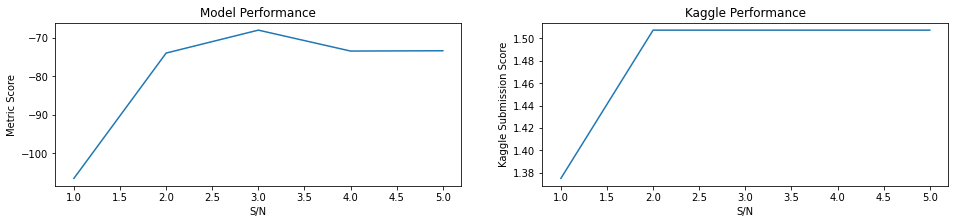

In [15]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,3))

ax1.plot(analysis_data['S/N'], analysis_data['Ensemble Score'])
ax1.set_title('Model Performance')
ax1.set_xlabel('S/N')
ax1.set_ylabel('Metric Score')

ax2.plot(analysis_data['S/N'], analysis_data['Kaggle Score'])
ax2.set_title('Kaggle Performance')
ax2.set_xlabel('S/N')
ax2.set_ylabel('Kaggle Submission Score')

## Competition Report

### The Best Performing Model
The Autogluon TabularPredictor makes use of many models and uses the Ensemble technique to come up with the best result. In the first training round, no model was specified. Autogluon TabularPredictor used the default models:

'CatBoostModel', 'WeightedEnsembleModel', 'LGBModel', 'KNNModel', 'XTModel', 'XGBoostModel', 'RFModel', 'NNFastAiTabularModel'

Of all these WeightedEnsembleModel had the best performance, followed by XGBoostModel. This is shown below.

In subsequent training rounds, custom values of hyperparameters were used to train XGBoost model. For each set of hyperparameters, predictions were generated and submitted to Kaggle. The results of this operation is tabulated in the Graphing Section: http://localhost:8888/notebooks/bike-sharing/notebooks/bike-sharing.ipynb#Ploting-Line-Graphs


In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -106.468035       0.238897  93.732047                0.002030           0.476691            2       True         11
1               XGBoost -107.323891       0.136857  76.303422                0.136857          76.303422            1       True          9
2       RandomForestMSE -124.198592       0.071620   4.080751                0.071620           4.080751            1       True          5
3         ExtraTreesMSE -133.137330       0.074830   1.968438                0.074830           1.968438            1       True          7
4         LightGBMLarge -133.792102       0.018026   1.350988                0.018026           1.350988            1       True         10
5              LightGBM -135.273422       0.012685   0.582415                0.012685           0.

/Users/Victor/Projects/udacity-aws-mle/venv/lib/python3.8/site-packages/autogluon/core/utils/plots.py:140: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -165.3253901971025,
  'KNeighborsDist': -174.0208265355214,
  'LightGBMXT': -137.22398616339171,
  'LightGBM': -135.27342240879952,
  'RandomForestMSE': -124.19859217806041,
  'CatBoost': -135.4851949497123,
  'ExtraTreesMSE': -133.13732993707615,
  'NeuralNetFastAI': -140.24432194188432,
  'XGBoost': -107.32389075515918,
  'LightGBMLarge': -133.79210211538518,
  'WeightedEnsemble_L2': -106.46803500292829},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': '../models/models1/models/KNeighborsUnif/',
  'KNeighborsDist': '../models/models1/models/KNe

### Feature Engineering

A bit of Feature Engineering was done to improve the perfoemance of the predictors.

The first one is the One-hot encoding of `season` into categorical data, since models are known to perform better on categorical data than on numeric data.
The second one is the convertion of `weather` from numeric to categorical data., using Pandas `astype` function. The direct effect of these changes is the high score recorded

http://localhost:8888/notebooks/bike-sharing/notebooks/bike-sharing.ipynb#Feature-Engineering

### Hyperparameter Tuning

A number of combinations of the hyperparameters were used. When the hyperparamters chnaged from the default, there was a clear increase in the Kaggle Score and the Model performance. However, with subsequent chenges, there were noticable changes in the model performance but the Kaggle submission score did not change. The default set of hyperparameters was not optimum.

This is shown in the table in Graphing session http://localhost:8888/notebooks/bike-sharing/notebooks/bike-sharing.ipynb#Ploting-Line-Graphs

In [2]:
!jupyter nbconvert --to html bike-sharing.ipynb

[NbConvertApp] Converting notebook bike-sharing.ipynb to html
[NbConvertApp] Writing 845996 bytes to bike-sharing.html
